<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_Twitter_Data_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn wordcloud nltk textblob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-9-48b13645e831>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df[2], palette="Set2")


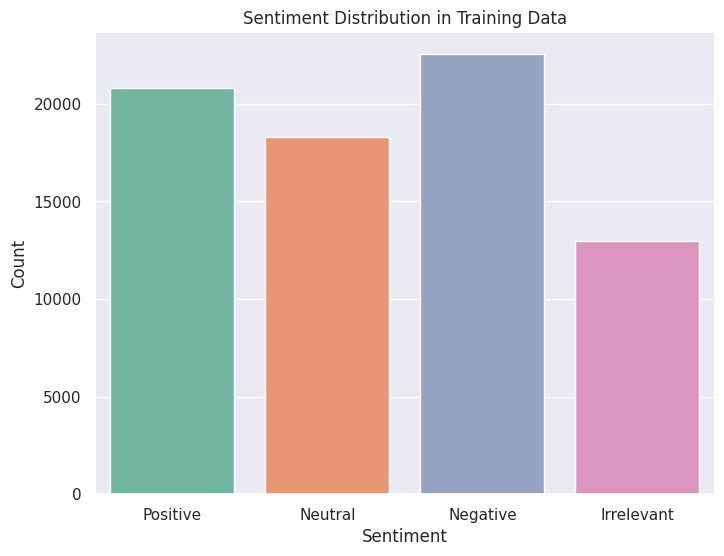

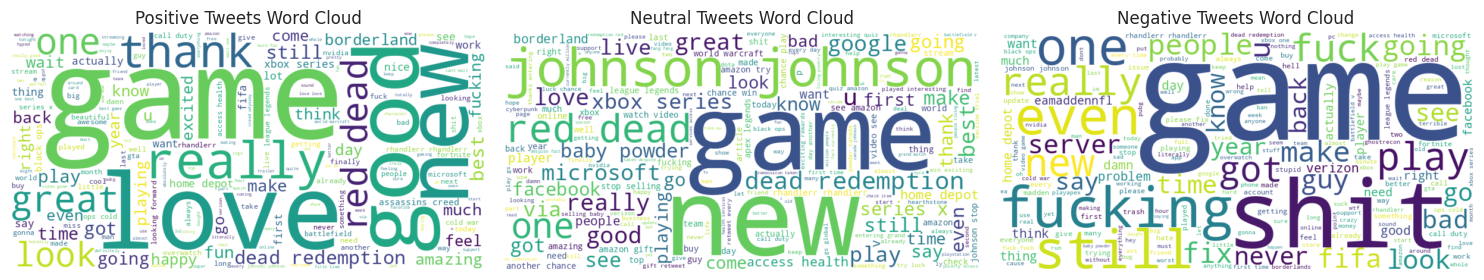

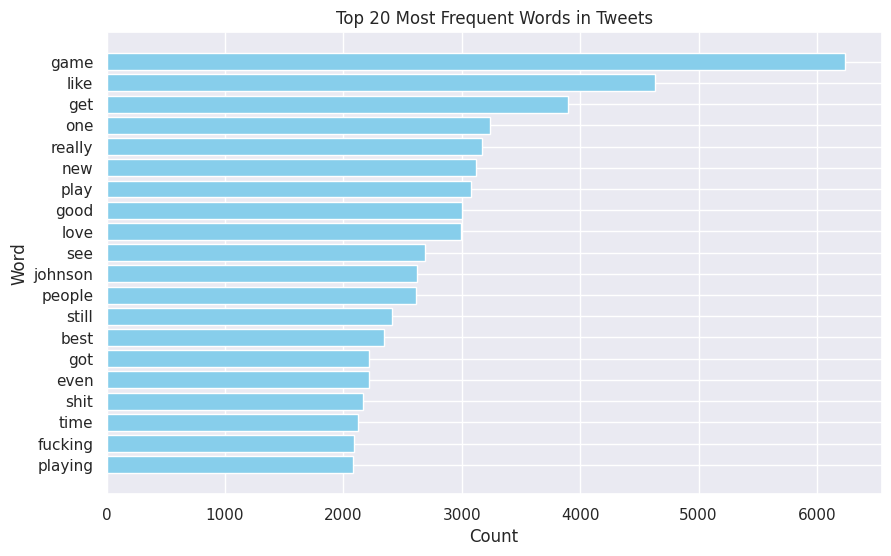

In [ ]:
# Twitter Sentiment Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Function to clean tweet text
def clean_tweet(tweet):

    tweet = tweet.lower()


    tweet = ' '.join([word for word in tweet.split() if not word.startswith('@')])


    tweet = ' '.join([word for word in tweet.split() if 'http' not in word])


    tweet = ' '.join([word for word in tweet.split() if word.isalpha()])


    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

    return tweet

# Load datasets
train_df = pd.read_csv('/content/twitter_training.csv',header=None)
valid_df = pd.read_csv('/content/twitter_validation.csv',header=None)

# Clean the tweet text in both datasets (assuming column 3 has tweet text)
train_df[3] = train_df[3].fillna('')
valid_df[3] = valid_df[3].fillna('')

train_df['clean_text'] = train_df[3].apply(clean_tweet)
valid_df['clean_text'] = valid_df[3].apply(clean_tweet)

# Visualize sentiment distribution
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x=train_df[2], palette="Set2")
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Generate Word Cloud for each sentiment (Positive, Neutral, Negative)
positive_tweets = ' '.join(train_df[train_df[2] == 'Positive']['clean_text'])
neutral_tweets = ' '.join(train_df[train_df[2] == 'Neutral']['clean_text'])
negative_tweets = ' '.join(train_df[train_df[2] == 'Negative']['clean_text'])

# Generate Word Clouds
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
neutral_wc = WordCloud(width=800, height=400, background_color='white').generate(neutral_tweets)
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

# Display Word Clouds
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wc, interpolation='bilinear')
plt.title('Neutral Tweets Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

# Most frequent words in the clean_text column (for word frequency analysis)
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize all clean tweets and get word frequencies
all_words = ' '.join(train_df['clean_text']).split()
word_counts = Counter(all_words)

# Get the 20 most common words
common_words = word_counts.most_common(20)

# Plot the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10,6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words in Tweets')
plt.gca().invert_yaxis()
plt.show()